In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [8]:
fname_data = 'Hypertension_data.csv'
data = np.genfromtxt(fname_data, delimiter=',')

num_data = len(data)
age_data = data[:, 1]
bmi_data = data[:, 2]
hypertension_data = data[:, 4]

hypertension_0_value = np.array([
    [age_data[i], bmi_data[i]] for i in range(len(data)) if hypertension_data[i] == 0
])
hypertension_1_value = np.array([
    [age_data[i], bmi_data[i]] for i in range(len(data)) if hypertension_data[i] == 1
])

all data shape : (1008, 6)
num_data : 1008
bmi data shape : (1008,)
smoking data shape : (1008,)
0 (699, 2)
1 (308, 2)


In [ ]:
def linear_regression(x, y, theta) :
    point = np.array([
        1, x, y
    ])
    value = np.matmul(theta, point.transpose()) 
return value

In [ ]:
def sigmoid_function(x, y, theta) :
    sigmoid_result = 1 / (1 + np.exp(-(linear_regression(x, y, theta))))
    return sigmoid_result

In [ ]:
def compute_loss(theta):
    compute_array = np.array([
        hypertension_data[i] * np.log(sigmoid(age_data[i], bmi_data[i], theta)) +
        (1 - hypertension_data[i]) * np.log(1 - sigmoid(age_data[i], bmi_data[i], theta)) for i in range(num_data)])
    loss = np.sum(compute_array) / (-(num_data))
    return loss

In [ ]:
def compute_gradient(theta) :
    sigmoid_matrix = np.array([
        sigmoid_function(age_data[i], bmi_data[i], theta) - hypertension_data[i] for i in range(num_data)
    ])
    
    data_matrix = np.array([
        [1 for _ in range(num_data)],
        age_data,
        bmi_data
    ]).transpose()
    gradient = np.matmul(sigmoid_matrix, data_matrix) / num_data
    return gradient

In [ ]:
num_iteration = 1000
learning_rate = 0.001
theta = np.array([0, 0, 0])

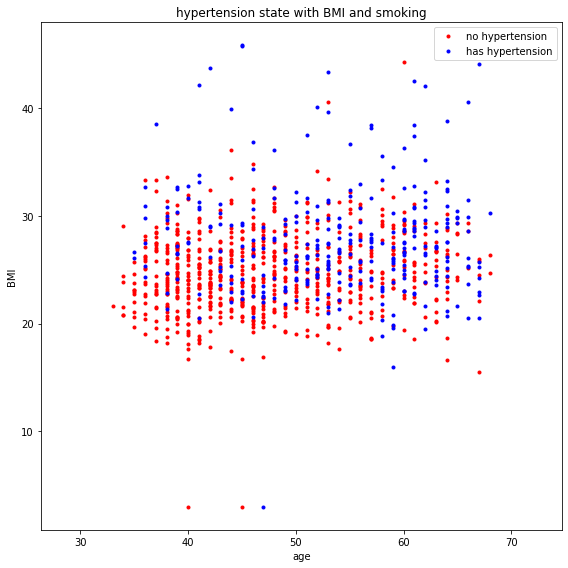

In [6]:
def plot_data(hypertension_0, hypertension_1):
    hypertension_0 = hypertension_0.transpose()
    hypertension_1 = hypertension_1.transpose()
    plt.figure(figsize=(8,8))
    plt.title('hypertension state with BMI and smoking')
    # plt.plot(class1[0], class1[1], '.', color = 'red', label = 'class = 1')

    plt.plot(hypertension_0[0], hypertension_0[1], '.', color = 'red', label = "no hypertension")
    plt.plot(hypertension_1[0], hypertension_1[1], '.', color = 'blue', label = "has hypertension")

    plt.xlabel("age")
    plt.ylabel("BMI")
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_data(hypertension_0_value, hypertension_1_value)